In [1]:
pip install fredapi

In [2]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import userdata
api_key = userdata.get('FRED_API_KEY')

from fredapi import Fred
fred = Fred(api_key=api_key)
print(fred.get_series('GDP').tail())

2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29962.047
2025-04-01    30353.902
dtype: float64


In [4]:
cpi = fred.get_series('CPIAUCSL', start='1990-01-01')
cpi.tail()

,0
2025-03-01,319.615
2025-04-01,320.321
2025-05-01,320.580
2025-06-01,321.500
2025-07-01,322.132


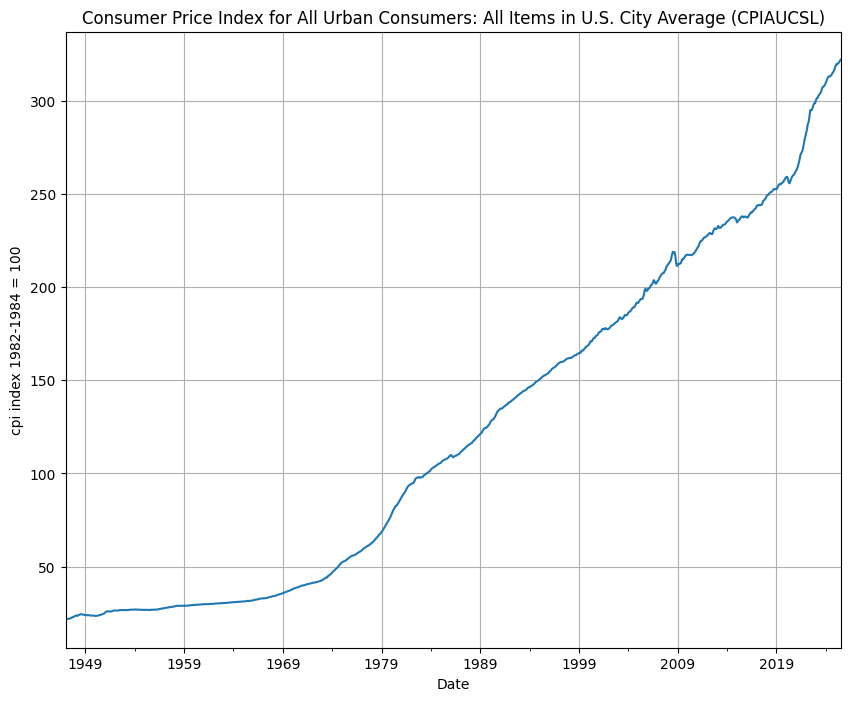

In [5]:
cpi.plot(figsize=(10,8),
         title='Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)',
         grid=True, xlabel='Date', ylabel='cpi index 1982-1984 = 100');

In [6]:
import yfinance as yf
import datetime

ticker = "^GSPC"
start = "1990-01-01"
end = datetime.date.today().strftime('%Y-%m-%d')

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.drop(columns=['Open', 'High', 'Low', 'Volume'])
sp_history = sp_history.asfreq('D').ffill().dropna()
sp_history = sp_history.rename(columns={'Close': 'sp_adj_close'})

print(sp_history.head())
print(sp_history.tail())

/tmp/ipython-input-3608208540.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp_history = yf.download(ticker, start=start, end=end, progress=False)


Price      sp_adj_close
Ticker            ^GSPC
Date                   
1990-01-02   359.690002
1990-01-03   358.760010
1990-01-04   355.670013
1990-01-05   352.200012
1990-01-06   352.200012
Price      sp_adj_close
Ticker            ^GSPC
Date                   
2025-08-29  6460.259766
2025-08-30  6460.259766
2025-08-31  6460.259766
2025-09-01  6460.259766
2025-09-02  6415.540039


In [7]:
sp_history.head()

Price,sp_adj_close
Ticker,^GSPC
Date,
1990-01-02,359.690002
1990-01-03,358.760010
1990-01-04,355.670013
1990-01-05,352.200012
1990-01-06,352.200012


In [8]:
sp_history = sp_history.rename(columns={'Adj Close': 'sp_adj_close'})
sp_history.columns = ['sp_adj_close']

In [9]:
sp_history.head()

,sp_adj_close
Date,
1990-01-02,359.690002
1990-01-03,358.760010
1990-01-04,355.670013
1990-01-05,352.200012
1990-01-06,352.200012


In [10]:
cpi_percent_change = cpi.pct_change().dropna()
cpi_percent_change.tail()

,0
2025-03-01,-0.000500
2025-04-01,0.002209
2025-05-01,0.000809
2025-06-01,0.002870
2025-07-01,0.001966


/tmp/ipython-input-1768176843.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(sp_history['sp_adj_close'].asfreq('M').ffill().dropna(), label ='S&P 500', color='r')


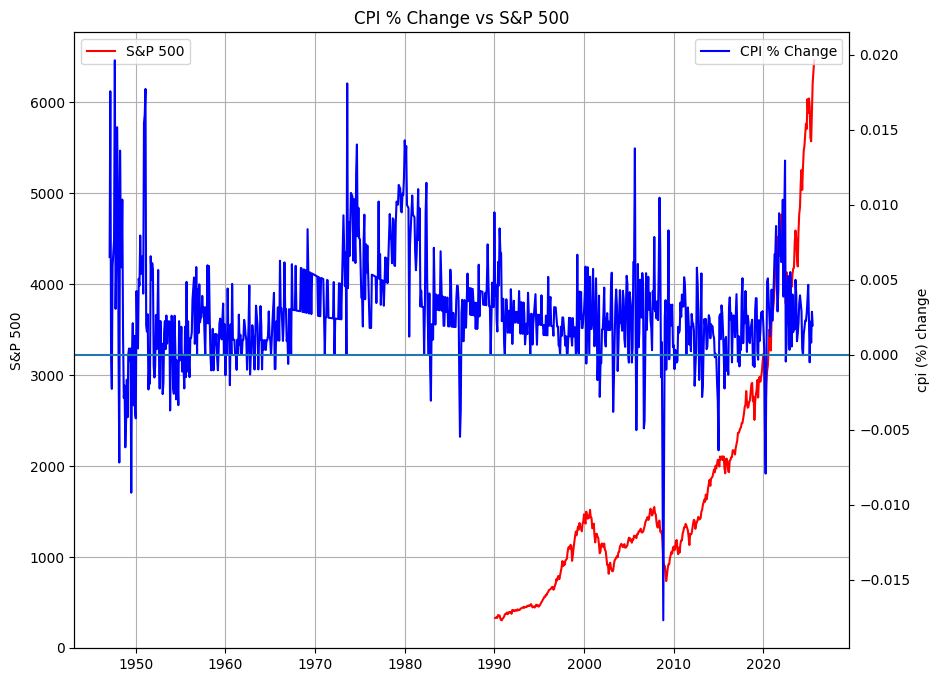

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(sp_history['sp_adj_close'].asfreq('M').ffill().dropna(), label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(cpi_percent_change, label='CPI % Change', color='b')
ax.set_title('CPI % Change vs S&P 500')
ax2.set_ylabel('cpi (%) change')
ax2.axhline(0)
ax2.legend(loc='upper right');

In [12]:
cpi.name = 'CPI'
cpi_percent_change.name = 'CPI_pct_chg'

# Combine all data
combined = pd.concat([sp_history, cpi, cpi_percent_change], axis=1).dropna()

# Filter from 2021 onwards
combined = combined['2021-01-01':].round(3)

print(combined.head())

            sp_adj_close      CPI  CPI_pct_chg
2021-01-01       3756.07  262.639        0.002
2021-02-01       3773.86  263.573        0.004
2021-03-01       3901.82  264.847        0.005
2021-04-01       4019.87  266.625        0.007
2021-05-01       4181.17  268.404        0.007


In [13]:
ref_basket_cost = cpi[cpi.index.year == 2024].iloc[0]

In [14]:
combined['sp_inf_adj'] = (combined['sp_adj_close'] / combined['CPI']) * ref_basket_cost

In [15]:
combined.tail()

,sp_adj_close,CPI,CPI_pct_chg,sp_inf_adj
2025-03-01,5954.50,319.615,-0.001,5771.532541
2025-04-01,5633.07,320.321,0.002,5447.945304
2025-05-01,5604.14,320.580,0.001,5415.587208
2025-06-01,5911.69,321.500,0.003,5696.441965
2025-07-01,6198.01,322.132,0.002,5960.619591


<Axes: title={'center': 'S&P 500 Inflation Adjusted'}, xlabel='Date', ylabel='S&P 500'>

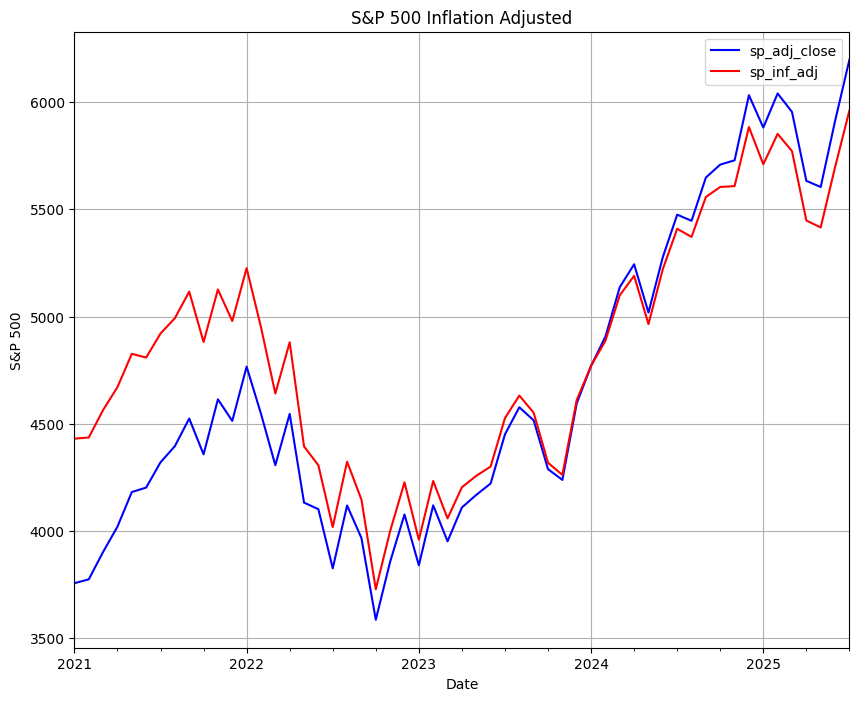

In [16]:
combined[['sp_adj_close', 'sp_inf_adj']].plot(figsize=(10,8),
                                              title='S&P 500 Inflation Adjusted',
                                              grid=True, ylabel='S&P 500',
                                              xlabel='Date',color=('b','r'))

# Recession Probability

In [17]:
from google.colab import userdata
api_key = userdata.get('FRED_API_KEY')

from fredapi import Fred
fred = Fred(api_key=api_key)

In [18]:
recession_prob = fred.get_series('RECPROUSM156N', observation_start='1990-01-01')
recession_prob = recession_prob.dropna()
recession_prob.tail()

,0
2025-03-01,0.08
2025-04-01,0.26
2025-05-01,0.44
2025-06-01,0.38
2025-07-01,0.80


In [19]:
ticker = "^VIX"
start= "1990-01-01"
end= datetime.datetime.today().strftime('%Y-%m-%d')

vix_history = yf.download(ticker, start=start,end=end, progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.tail()

/tmp/ipython-input-1272295406.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix_history = yf.download(ticker, start=start,end=end, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,
2025-08-29,15.36,15.970000,14.310000,14.31,0.0
2025-08-30,15.36,15.970000,14.310000,14.31,0.0
2025-08-31,15.36,15.970000,14.310000,14.31,0.0
2025-09-01,15.36,15.970000,14.310000,14.31,0.0
2025-09-02,17.17,19.379999,16.549999,16.65,0.0


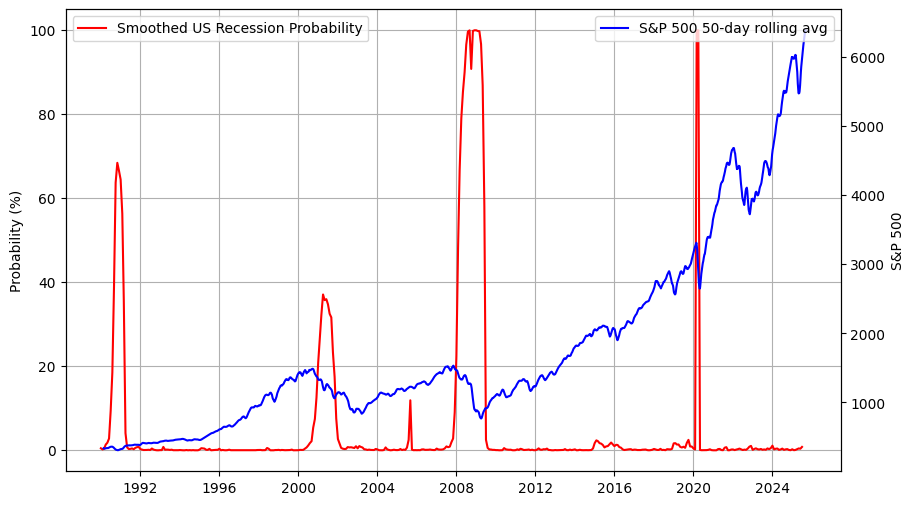

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(recession_prob, label ='Smoothed US Recession Probability', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(sp_history['sp_adj_close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

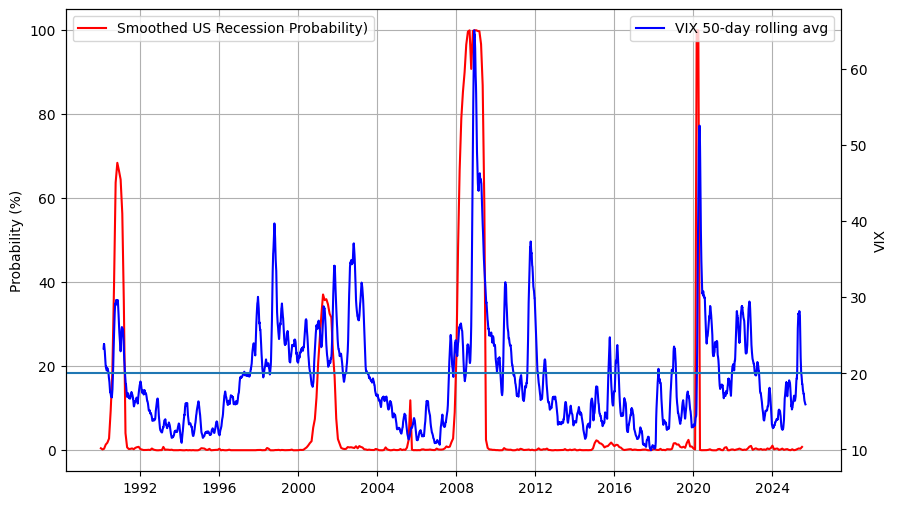

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(recession_prob, label ='Smoothed US Recession Probability)', color='r')
ax.set_ylabel('Probability (%)')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Close'].rolling(window=50).mean(), label ='VIX 50-day rolling avg', color='b')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20);

In [22]:
ten_three_treasury_spread = fred.get_series('T10Y3M', observation_start='1990-01-01')
ten_three_treasury_spread = ten_three_treasury_spread.dropna()
ten_three_treasury_spread.tail()

,0
2025-08-26,-0.02
2025-08-27,-0.02
2025-08-28,-0.04
2025-08-29,0.00
2025-09-02,0.08


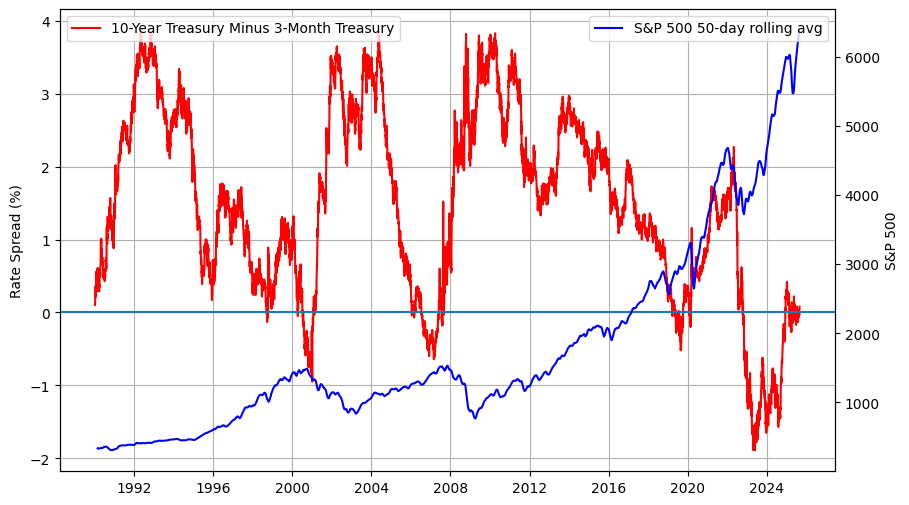

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(sp_history['sp_adj_close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

In [24]:
from google.colab import userdata
api_key = userdata.get('FRED_API_KEY1')

from fredapi import Fred
fred = Fred(api_key=api_key)

In [25]:
start = (datetime.datetime.today() - pd.DateOffset(years=40)).strftime('%Y-%m-%d')
end = datetime.datetime.today().strftime('%Y-%m-%d')

dgs10 = fred.get_series('DGS10', start, end)
dgs3mo = fred.get_series('DGS3MO', start, end)
dtb3 = fred.get_series('DTB3', start, end)
rec_prob = fred.get_series('RECPROUSM156N', start, end)
nber_rec = fred.get_series('USREC', start, end)

combined = pd.concat([dgs10, dgs3mo, dtb3, rec_prob, nber_rec], axis=1)
combined.columns = [
    '10Y_Treasury',
    '3M_Treasury',
    '3M_Treasury_BondEq',
    'Recession_Prob',
    'NBER_Recession'
]
combined['Spread'] = combined['10Y_Treasury'] - combined['3M_Treasury']

combined = combined.asfreq('D').ffill()

combined.tail()

,10Y_Treasury,3M_Treasury,3M_Treasury_BondEq,Recession_Prob,NBER_Recession,Spread
2025-08-25,4.28,4.29,4.10,0.8,0.0,-0.01
2025-08-26,4.26,4.28,4.10,0.8,0.0,-0.02
2025-08-27,4.24,4.26,4.08,0.8,0.0,-0.02
2025-08-28,4.22,4.26,4.08,0.8,0.0,-0.04
2025-08-29,4.23,4.23,4.05,0.8,0.0,0.00


In [26]:
treasury_spread_recession_prob = combined[['Recession_Prob']].dropna()
treasury_spread_recession_prob.head()

,Recession_Prob
1985-09-01,0.08
1985-09-02,0.08
1985-09-03,0.08
1985-09-04,0.08
1985-09-05,0.08


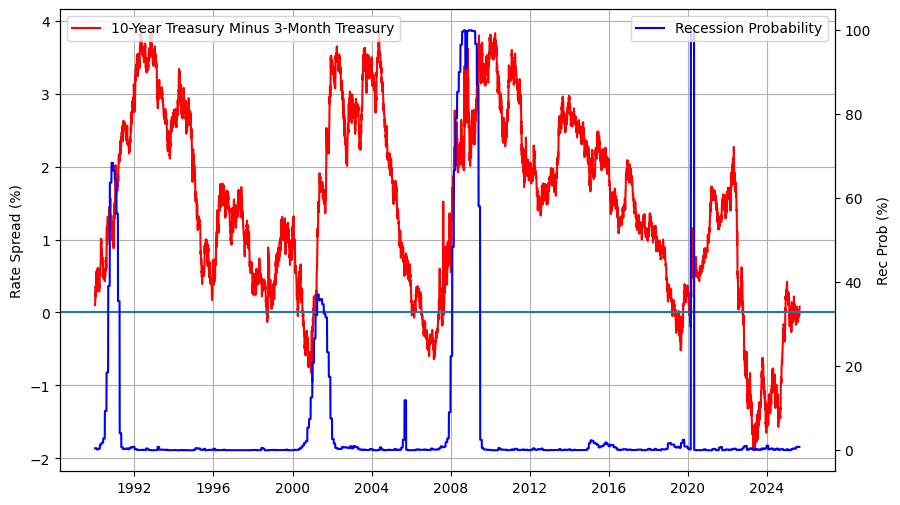

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(ten_three_treasury_spread, label ='10-Year Treasury Minus 3-Month Treasury', color='r')
ax.set_ylabel('Rate Spread (%)')
plt.grid()
ax.legend(loc='upper left')
ax.axhline(y=0)

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability', color='b')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right');

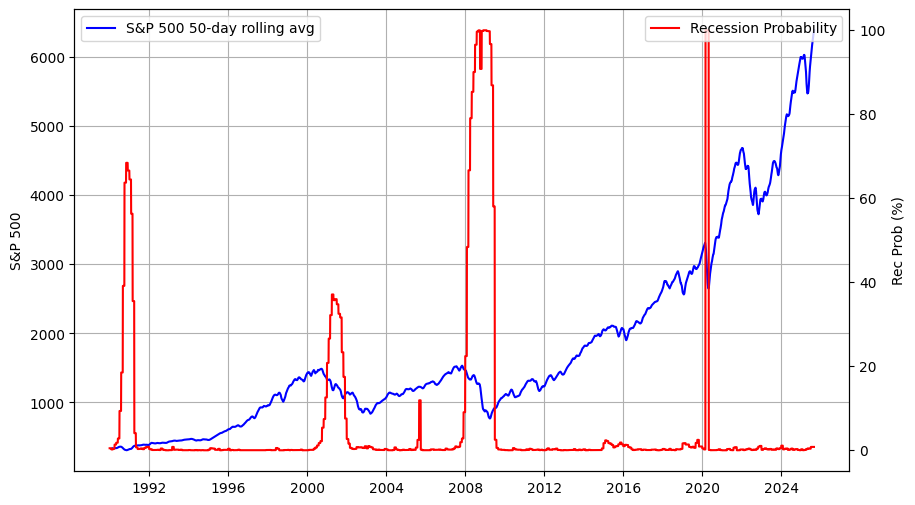

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(sp_history['sp_adj_close'].rolling(window=50).mean(), label ='S&P 500 50-day rolling avg', color='b')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(treasury_spread_recession_prob['1990':], label ='Recession Probability', color='r')
ax2.set_ylabel('Rec Prob (%)')
ax2.legend(loc='upper right');